<a href="https://colab.research.google.com/github/ninadcpa/DSC630/blob/main/Predictive_Analytics_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predictive Analytics (DSC 630) - Final Project

Term - Fall 2021
Bellevue University

@Author - Ninad Patkhedkar  
@Instructor - Fadi Alsaleem

# MileStone-1 - High Level Plan

I will work on Individual Project. I will use Python as my preferred coding language for final project.

This subject is for 12 weeks, so I plan to finish the project in 4 milestones having 3 week per milestones. (It may vary/increase based on review comments I receive)

Tentatively I think about task perfomred in each milestone

1. Milestone 1 - Identify dataset and decide what intersting things can be predicted from data set.

2. Milestone 2 - Describe the objective, scope of the project and provide plan about timelines, milestones, risks and risk mitigation details.

3. Milestone 3 - Data Wranggling where will clean up data, handle outliers, rename any fields, derive any new fields

4. Milestone 4 - Feature extraction and apply various Machine Learning models for predictions.

5. Milestone 5 - Re-run and fine tune ML models till satisfaction and Summarize the whole findings as a story with relevant reports.

# MileStone-2 - Project Idea, Scope, Plan and Risk 

### **Introduction**


#### *Background*

For centuries mankind has completely relied on Fossil Fuels as primary energy source. With improvement of living standards demand for energy source increased and hence consumption also increased. This had couple of side effects  
* Fossil fuel (Hydrocarbon) energy consumption increased carbon emissions causing Global warming  
* Fossil fuel resources depleted considerably and will exhaust very soon

These side effects triggered search for Non-Convensional energy sources. **Solar energy is considered as most aboundantly available resource.** To harvest solar energy efficiently some imprtant factors should be considered for impact like Sunlight availabilty,wind, humidity, temperature etc.

In this project, I will check Solar Radiation dataset and try to determine impact of various factors. Then I will try to build a predictive Model and predict Solar Radiation values give other factors.

#### *Problem Statement*

1. How various factors like humidty, sunlight time, wind speed, and pressure affect the solar radiation value?
2. Predict solar radiation value to determine if solar energy can harvested?

#### *Scope*

* This project will be developed and delivered as individual project.
* This project will delivered in timely manner in 4-5 milestones.
* Dataset is assumed to be accurate.

#### *Document Overview*

This document covers the technical approach, data sources, analysis, model selection/development, expected results, project risks, and the execution of all areas listed above.  

### **Requirements**

#### Technical Approach

The approach being used for this project is the Cross Industry Standard Process for Data Mining more commonly known as CRISP-DM. The main objective of this project is to determine factors affecting Solar Energy and predict Solar Radiation value. Multiple unsupervised machine learning techniques will be explored such as Linear and Random Forest Regression. If the models fail to provide accurate results I will focus on obtaining different/more data and try again. 

#### *Data Sources*

Dataset is available on Kaggle.

> Dataset URL - https://www.kaggle.com/dronio/SolarEnergy?select=SolarPrediction.csv  
> License - 
Database: Open Database, Contents: Database Contents

These datasets are meteorological data from the HI-SEAS weather station from four months (September through December 2016) between Mission IV and Mission V.

Some features in dataset are

> Solar radiation - Soalr Radiation value in watts per meter^2  
> Temperature - Temperature value in degrees Fahrenheit  
> Humidity - Humidity percent value  
> Barometric pressure - Atmospheric pressure Hg  
> Wind direction - Wind direction in degrees  
> Wind speed - Wind speed in miles per hour  
> Sunrise/sunset - Sunrise and Sunset time (Hawaii timezone)  



#### *Requirement Development*

The requirements to complete this project include  

* The data should be accurate  
* Credible
* Complete. No need or very less need to remove or auto fill data   

Software needed to complete this project 
* Python
* I will use cloud based notebook at https://colab.research.google.com
 

#### *Model Deployment*

I googled a bit and noticed that solar energy predictions are always kind of wrong. Hence I will target low i.e. to build a model that has a minimum acceptance accuracy of 50%. Then I will try to improve accuracy upto 65% by iterating more over the model. 

The Dataset contains continous data and hence will use regression models like Linear Regression, RandomForestRegressor etc.


After the model is trained and debugged it will be deployed. The model will be optimized using different techniques such as gradient boosting. Since this is a solo project I will be in charge of all steps along the development and deployment of this model.  

#### *Testing & Evaluation*

I plan to test model for
* Accuracy  
* Precision  
* F1 Score 
* Confusion Matrix 


### **Expected Results**

Expecting to extract features which have significant impact on Solar Radiation value. Using this data an accurate model will be developed that can predict future value of Solar radiation without false positives. 

### **Execution and Management of Project**

#### *Project Plan*

This subject is for 12 weeks, so I plan to finish the project in 4 milestones having 3 week per milestones. (It may vary/increase based on review comments I receive)

Tentatively I think about task perfomred in each milestone

1. Milestone 1 - Identify dataset and decide what intersting things can be predicted from data set.

2. Milestone 2 - Data Wranggling where will clean up data, handle outliers, rename any fields, derive any new fields

3. Milestone 3 - Feature extraction and apply various Machine Learning models for predictions.

4. Milestone 4 - Re-run and fine tune ML models till satisfaction and Summarize the whole findings as a story with relevant reports.

#### *Project Risk*

Overall in world, Solar Energy harvesting predictions have gone wrong causing increased investments or less ROI. I would have preferred to have location data along with weather data for world wide locations. However the dataset is looks to be for single place (Hawai), hence predictions would be limited for that location. 

Risk is Prediction Model accuracy can be little lower than 80%. 

For Risk mitigation, I am targeting low accuracy value first. I will try to improve accuracy by re-fitting model and will also try to find if any other relevant data is available to predict Solar Radiation values.

# MileStone-3 - Data Preparation

### Data Loading

In this stage, I will load and describe data. Then will work of data preparation to clean data, fill missing values and handle outlier values.

Dataset file is downloaded from kaggle - https://www.kaggle.com/dronio/SolarEnergy?select=SolarPrediction.csv

and stored on Google Drive under folder "Colab Notebooks/DSC630"

In [1]:
# This code is written for mounting code folder checked out from github on google drive
# All assignment code will be maintained inside folder "DSC630"

from google.colab import drive
import sys
import os

drive.mount('/content/drive')
sys.path.append('/content/drive/MyDrive/Colab Notebooks/DSC630')
os.chdir('/content/drive/MyDrive/Colab Notebooks/DSC630')

Mounted at /content/drive


In [2]:
from __future__ import print_function

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

pd.set_option("display.precision", 3)
# Substitute values used for missing values in dataset
missing_values = ["n/a", "na", "--",""]
# Load the data in pandas dataframe with missing values set to NaN
df = pd.read_csv('SolarPrediction.csv',na_values = missing_values)

Checking how may observations and features are present in dataset.

In [3]:
df.shape

(32686, 11)

So there are are 32k+ observations and 11 features in dataset.

Lets check what features present and what is there data type?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [5]:
# Lets check the sample data
df.sample(10)

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
10987,1476920421,10/19/2016 12:00:00 AM,13:40:21,384.02,58,30.42,95,72.49,4.50,06:19:00,17:56:00
31255,1481240149,12/8/2016 12:00:00 AM,13:35:49,285.68,58,30.35,89,108.72,3.37,06:45:00,17:44:00
4448,1473788107,9/13/2016 12:00:00 AM,07:35:07,167.62,53,30.44,76,165.92,3.37,06:10:00,18:27:00
5147,1473573920,9/10/2016 12:00:00 AM,20:05:20,3.32,50,30.42,90,145.99,1.12,06:09:00,18:30:00
10251,1477141517,10/22/2016 12:00:00 AM,03:05:17,1.21,48,30.40,102,172.03,4.50,06:20:00,17:54:00
92,1475201723,9/29/2016 12:00:00 AM,16:15:23,511.38,58,30.43,52,69.08,3.37,06:13:00,18:13:00
3242,1474231805,9/18/2016 12:00:00 AM,10:50:05,960.21,62,30.48,60,43.70,6.75,06:11:00,18:23:00
26703,1482609042,12/24/2016 12:00:00 AM,09:50:42,637.15,54,30.48,80,111.52,6.75,06:54:00,17:50:00
31361,1480983952,12/5/2016 12:00:00 AM,14:25:52,62.24,45,30.33,93,305.00,6.75,06:44:00,17:43:00
18637,1479761703,11/21/2016 12:00:00 AM,10:55:03,922.11,58,30.44,89,0.12,4.50,06:35:00,17:42:00


There appears to be couple of confusing fields i.e Unixtime, Data and Time. Not sure what each fields stands for.

To check this let me convert Unixtime field to readable format for first displayed record

In [6]:
import datetime
import pytz
# Unixtime is for Hawaii timezone so passing timezone as 'US/Hawaii'
datetime_time = datetime.datetime.fromtimestamp(1479760502,tz= pytz.timezone('US/Hawaii'))
datetime_time

datetime.datetime(2016, 11, 21, 10, 35, 2, tzinfo=<DstTzInfo 'US/Hawaii' HST-1 day, 14:00:00 STD>)

Now we got it clarified

Unixtime - Time when radiation was measured in [epoach  time](https://en.wikipedia.org/wiki/Unix_time)  format  
Data - Time when measured data for that day is consolidated and recorded  
Time - Time in hh:mm:ss format when solar radiation was measured  

### Information about features

> **Unixtime** - Time when radiation was measured in epoach time  
> **Data** - Time when measured data for that day is consolidated and recorded  
> **Time** - Time in hh:mm:ss format when solar radiation was measured  
> **Solar radiation** - Solar Radiation value in watts per meter^2  
> **Temperature** - Temperature value in degrees Fahrenheit  
> **Barometric pressure** - Atmospheric pressure Hg   
> **Humidity** - Humidity percent value  
> **Wind direction** - Wind direction in degrees  
> **Wind speed** - Wind speed in miles per hour  
> **Sunrise** - Sunrise time (Hawaii timezone)  
> **Sunset** - Sunset time (Hawaii timezone)


### Missing Data

Now lets check if there is any missing data

In [7]:
df.isnull().sum()

UNIXTime                  0
Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64

Dataset is looking to be very clean and there are no missing records.

### Data Description and Distribution

Lets check the Summary of Data for continous variables

In [8]:
df.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,3.27e+04,32686.00,32686.0,32686.00,32686.00,32686.00,32686.00
mean,1.48e+09,207.12,51.1,30.42,75.02,143.49,6.24
std,3.01e+06,315.92,6.2,0.05,25.99,83.17,3.49
min,1.47e+09,1.11,34.0,30.19,8.00,0.09,0.00
25%,1.48e+09,1.23,46.0,30.40,56.00,82.23,3.37
50%,1.48e+09,2.66,50.0,30.43,85.00,147.70,5.62
75%,1.48e+09,354.24,55.0,30.46,97.00,179.31,7.87
max,1.48e+09,1601.26,71.0,30.56,103.00,359.95,40.50


Now lets check the Summary of nominal variables

In [9]:
df.describe(include=['O'])

,Data,Time,TimeSunRise,TimeSunSet
count,32686,32686,32686,32686
unique,118,8299,51,56
top,11/26/2016 12:00:00 AM,16:20:18,06:11:00,17:42:00
freq,288,24,1399,3682


Name of the field 'WindDirection(Degrees)' is too long. Let me rename the column

In [10]:
df = df.rename(columns={'WindDirection(Degrees)':'Direction'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   UNIXTime     32686 non-null  int64  
 1   Data         32686 non-null  object 
 2   Time         32686 non-null  object 
 3   Radiation    32686 non-null  float64
 4   Temperature  32686 non-null  int64  
 5   Pressure     32686 non-null  float64
 6   Humidity     32686 non-null  int64  
 7   Direction    32686 non-null  float64
 8   Speed        32686 non-null  float64
 9   TimeSunRise  32686 non-null  object 
 10  TimeSunSet   32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


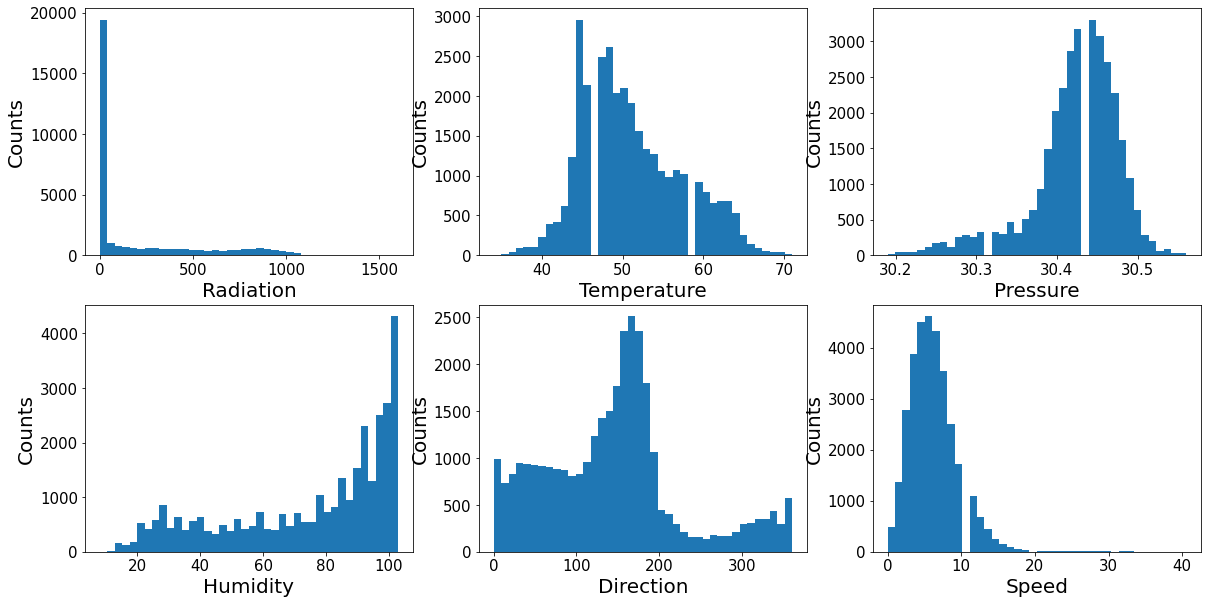

In [11]:
# set up the figure size
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 3)

# Specify the features of interest
num_features = ['Radiation','Temperature','Pressure','Humidity','Direction','Speed']

xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts','Counts','Counts']

# draw histograms
axes = axes.ravel()

for idx, ax in enumerate(axes):
    ax.hist(df[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)

> **Solar Radiation** - observations are concentrated within small range of values. They are left (negatively) skewed skewed. It has high standard deviation value.  
> **Temperature** -  observations are also left(negatively) skewed. It has comparatively small standard deviation value.  
> **Pressure** - Pressure value observations seems to follow normal distribution. Standard deviation value is also very minimal.  
> **Humidity** - Humidity values are distributed with right (positive) skew with kind of high standard deviation value  
> **Wind Direction** - Wind direction values seems to have slight left (negative) skew in its distribution with medium standard devaition 
> **Wind Speed** - Wind speed values distribution seems to have left (negative) skew with low standard deviation. 


### Outlier Detection

Now lets check the outliers using box plots

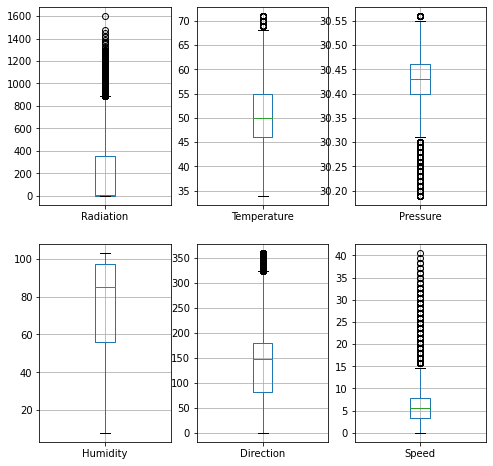

In [12]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(8, 8))
df.boxplot(column=['Radiation'],ax=axs[0,0])
df.boxplot(column=['Temperature'],ax=axs[0,1])
df.boxplot(column=['Pressure'],ax=axs[0,2])
df.boxplot(column=['Humidity'],ax=axs[1,0])
df.boxplot(column=['Direction'],ax=axs[1,1])
df.boxplot(column=['Speed'],ax=axs[1,2])
plt.show()

So there are lot of outliers.

Now lets see feature correlation to check which all factors affect more on Solar Radiation.

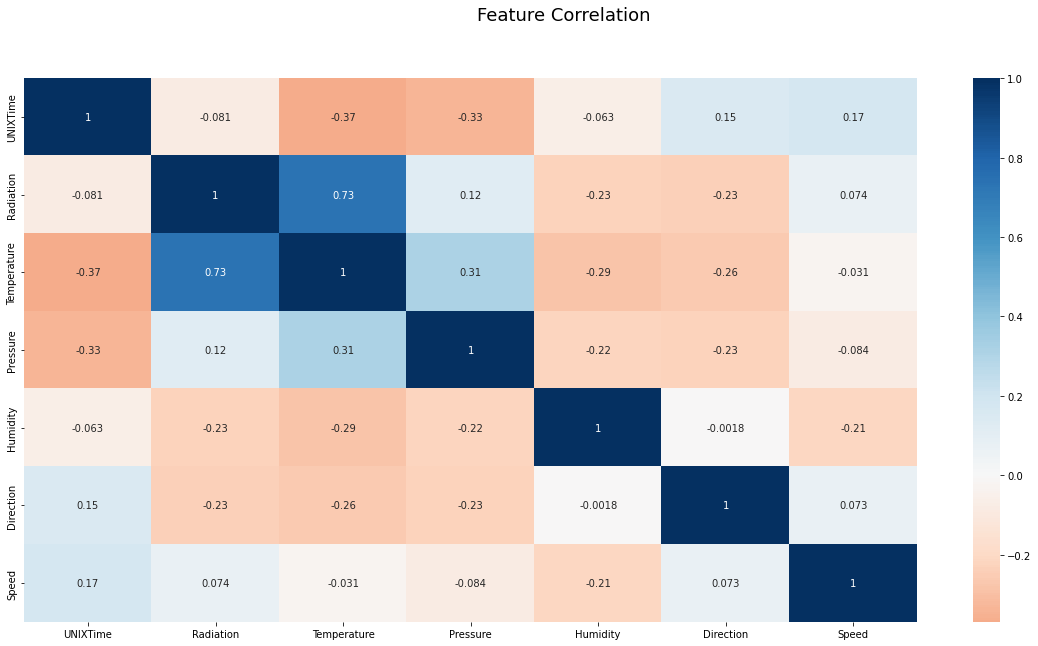

In [13]:
fig = plt.figure()
fig.suptitle('Feature Correlation', fontsize=18)
sns.heatmap(df.corr(), annot=True, cmap='RdBu', center=0)

We can see Temperature has strong positive correlation to Solar Radiation. 

# MileStone-4 - Feature Extraction and Model Training

### Feature Extraction

The dataset logged date and and timestamp field when measurement was carried out. However it is obvious that there is no solar radiation during night time and radiation varies with season. e.g. During Summer solar radiation is high and during winters its low

Hence lets derive additional fields from timestamp like month of year, day of year, hour of day, length of the day. This derived information will help with finding more insights and model building. 

In [14]:
hawaii = pytz.timezone('US/Hawaii')
df.index =  pd.to_datetime(df['UNIXTime'], unit='s')
df.index = df.index.tz_localize(pytz.utc).tz_convert(hawaii)
df['MonthOfYear'] = df.index.strftime('%m').astype(int)
df['DayOfYear'] = df.index.strftime('%j').astype(int)
df['WeekOfYear'] = df.index.strftime('%U').astype(int)
df['TimeOfDay(h)'] = df.index.hour
df['TimeOfDay(m)'] = df.index.hour*60 + df.index.minute
df['TimeOfDay(s)'] = df.index.hour*60*60 + df.index.minute*60 + df.index.second
df['TimeSunRise'] = pd.to_datetime(df['TimeSunRise'], format='%H:%M:%S')
df['TimeSunSet'] = pd.to_datetime(df['TimeSunSet'], format='%H:%M:%S')
df['DayLength(s)'] = df['TimeSunSet'].dt.hour*60*60 \
                           + df['TimeSunSet'].dt.minute*60 \
                           + df['TimeSunSet'].dt.second \
                           - df['TimeSunRise'].dt.hour*60*60 \
                           - df['TimeSunRise'].dt.minute*60 \
                           - df['TimeSunRise'].dt.second
df.drop(['Data','Time','TimeSunRise','TimeSunSet'], inplace=True, axis=1)
df.head()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,Direction,Speed,MonthOfYear,DayOfYear,WeekOfYear,TimeOfDay(h),TimeOfDay(m),TimeOfDay(s),DayLength(s)
UNIXTime,,,,,,,,,,,,,,
2016-09-29 23:55:26-10:00,1475229326,1.21,48,30.46,59,177.39,5.62,9,273,39,23,1435,86126,43200
2016-09-29 23:50:23-10:00,1475229023,1.21,48,30.46,58,176.78,3.37,9,273,39,23,1430,85823,43200
2016-09-29 23:45:26-10:00,1475228726,1.23,48,30.46,57,158.75,3.37,9,273,39,23,1425,85526,43200
2016-09-29 23:40:21-10:00,1475228421,1.21,48,30.46,60,137.71,3.37,9,273,39,23,1420,85221,43200
2016-09-29 23:35:24-10:00,1475228124,1.17,48,30.46,62,104.95,5.62,9,273,39,23,1415,84924,43200


Now lets plot radiation, temperature, humidity against time of the day and month of the year.

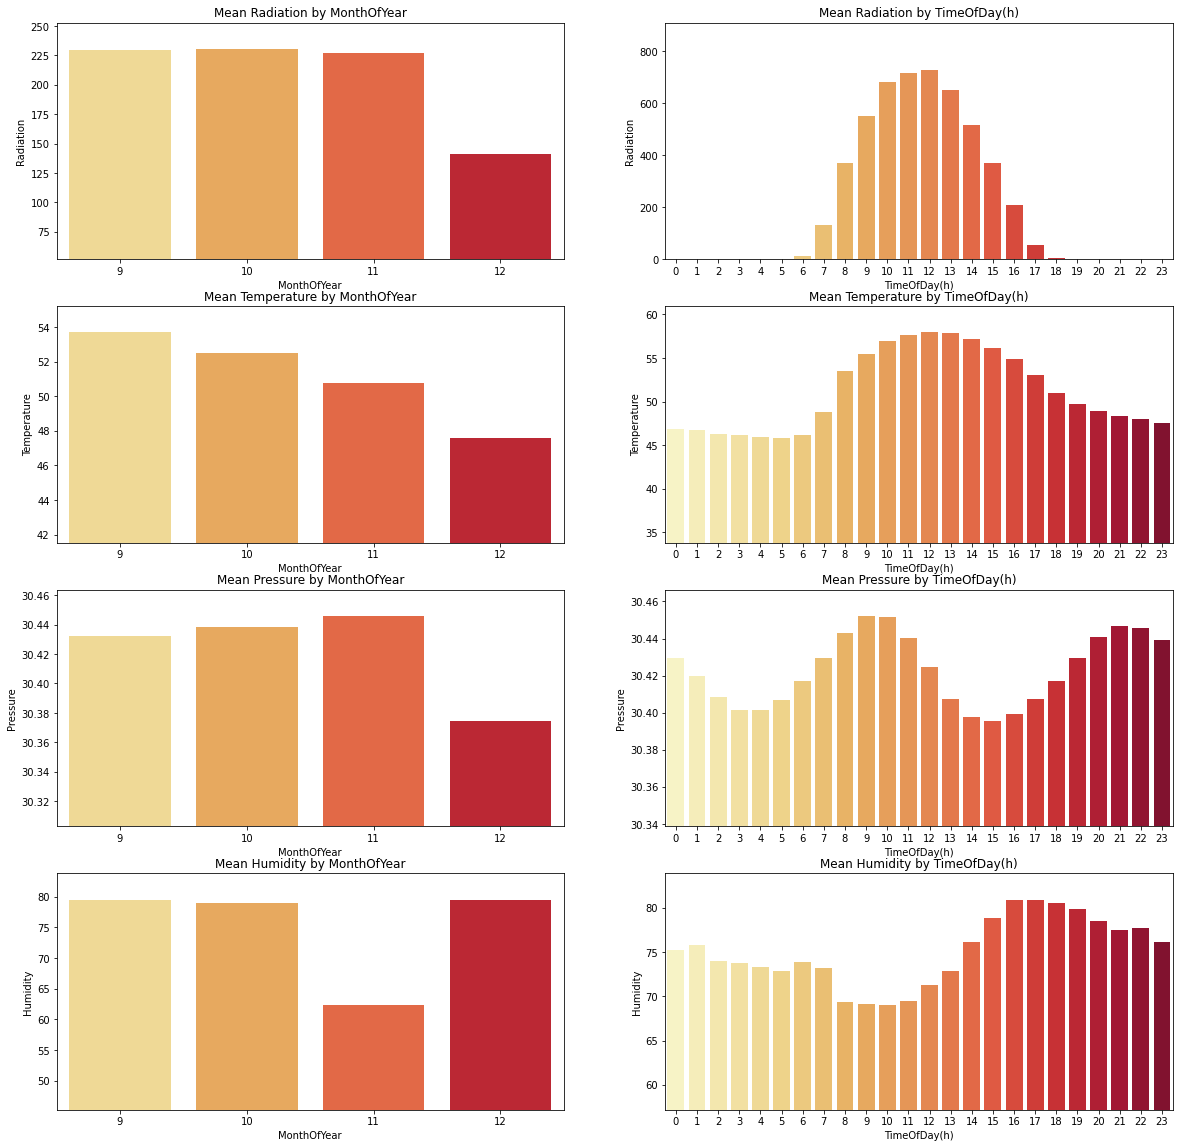

In [15]:
fig, ax = plt.subplots(4, 2, figsize=(20, 20))
for j, timeunit in enumerate(['MonthOfYear', 'TimeOfDay(h)']):
    grouped_data=df.groupby(timeunit).mean().reset_index()
    palette = sns.color_palette("YlOrRd", len(grouped_data))
    for i, col in enumerate(['Radiation', 'Temperature', 'Pressure', 'Humidity']):
        sns.barplot(data=grouped_data, x=timeunit, y=col, ax=ax[i][j], palette=palette)
        ax[i][j].set_title(f'Mean {col} by {timeunit}', fontsize=12)
        range_values = grouped_data[col].max() - grouped_data[col].min()
        ax[i][j].set_ylim(max(grouped_data[col].min() - range_values, 0), grouped_data[col].max() + 0.25*range_values)

* Solar radiation is positively correlated with temperature  
* Atmospheric Pressure and Humidity are correlated with each other
* Temperature plots are as expected bell shaped peaked at 12 noon
* Slight decrease in temperature and solar radiation as winter arrives

Now lets split the dataset into training dataset (80%) and test dataset (20%).

In [16]:
# Splitting dataset into Training dataset and Test dataset
X = df[['Temperature', 'Pressure', 'Humidity', 'Direction', 'Speed', 'DayOfYear', 'TimeOfDay(s)']]
y = df['Radiation']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

Since solar radiation is numeric variable, predicting it is regression problem. Linear regression can be tried, however dataset feature distribution shows lot of skewed fields. It doesn't follow normal distribution. Linear regression generally works well with normally distibuted data. So I don't think using Linear regression will provide accurate model.

In such cases, Decision Trees is best option.

The sci-kit learn library provides decision tree based regressors which contains a feature importance attribute. This attribute can be used to perform a backwards elimination procedure, where the least important feature of the regressor would be repeatedly removed and the r2 scores, from cross validation, of each model would be recorded.

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
regressor = RandomForestRegressor(n_estimators = 100)
regressor.fit(X_train, y_train)
feature_importances = regressor.feature_importances_

X_train_opt = X_train.copy()
removed_columns = pd.DataFrame()
models = []
r2s_opt = []

for i in range(0,5):
    least_important = np.argmin(feature_importances)
    removed_columns = removed_columns.append(X_train_opt.pop(X_train_opt.columns[least_important]))
    regressor.fit(X_train_opt, y_train)
    feature_importances = regressor.feature_importances_
    accuracies = cross_val_score(estimator = regressor,
                                 X = X_train_opt,
                                 y = y_train, cv = 5,
                                 scoring = 'r2')
    r2s_opt = np.append(r2s_opt, accuracies.mean())
    models = np.append(models, ", ".join(list(X_train_opt)))
    
feature_selection = pd.DataFrame({'Features':models,'r2 Score':r2s_opt})
feature_selection.head()

,Features,r2 Score
0,"Temperature, Pressure, Humidity, Direction, Da...",0.93
1,"Temperature, Humidity, Direction, DayOfYear, T...",0.93
2,"Temperature, Humidity, DayOfYear, TimeOfDay(s)",0.93
3,"Temperature, DayOfYear, TimeOfDay(s)",0.93
4,"Temperature, TimeOfDay(s)",0.80


From output we can notice that 

* Model performance stays relatively constant until 'DayOfYear' is removed
* Keeping only 2 features   'Temperature' and 'TimeOfDay(s)' produces significantly low $r^2$  
* Random forest regressor, fit to 'Temperature', 'TimeOfDay(s)' and 'DayOfYear' is able to acheive a r2 score as high as 0.93.

In [19]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

results_df = pd.DataFrame()
columns = ["Model", "Cross Val Score", "MAE", "MSE", "RMSE", "R2"]

def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

def append_results(model_name, model, results_df, y_test, pred):
    results_append_df = pd.DataFrame(data=[[model_name, *evaluate(y_test, pred) , cross_val_score(model, X, y, cv=10).mean()]], columns=columns)
    results_df = results_df.append(results_append_df, ignore_index = True)
    return results_df

In [20]:
X_train_best = X_train[['Temperature', 'DayOfYear', 'TimeOfDay(s)']]
X_test_best = X_test[['Temperature', 'DayOfYear', 'TimeOfDay(s)']]
regressor.fit(X_train_best, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [23]:
pred = regressor.predict(X_test_best)
results_df= append_results("Random Forest",RandomForestRegressor(),results_df,y_test,pred)
results_df

,Model,Cross Val Score,MAE,MSE,RMSE,R2
0,Random Forest,29.67,6534.76,80.84,0.94,0.75


# MileStone-5 - Final

### Docs

In [18]:
# Code